<a href="https://colab.research.google.com/github/hectorlehmann/data_science_parte2/blob/main/ProyectoDs_parte_2_HectorLehamnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##TRABAJO DATA SCIENCE - PRIMERA PRE ENTREGA

##Analisis de ventas de bicicletas y accesorios:

Para este analisis contamos el (dataset) de una empresa dedicada a la venta de bicicletas y varios accesorios en varios paises de  europa, oceania y america del norte, este mismo esta representado por 18 columnas y 113036 filas.

En un primer analisis que se hizo no contiene ningun dato nulo (NaN), de las 18 columnas en total, cuenta con 4 dedicadas a las fechas, 7 de tipo cualitativo y el resto de tipo cuatitativo, por lo cual  se puede decir que es bastante equilibrado a la hora de analizar y realizar los graficos.

###OBJETIVO
Lograr predecir cuanto va a ser el ingreso("Revenue") en los proximos años

###CONTEXTO COMERCIAL
Creemos que realizando estos modelos se pueden resolver ciertas dudas en la empresa con respecto a su futuro y obtener una prediccion lo mas exacta posible a la hora de obtener las ganancias y los costos de cada venta

###HIPOTESIS Y PREGUNTAS

¿Cuantos hombres y mujeres participaron en las ventas?

¿Cual fue la categoria que tuvo mas ventas?

¿Cual fue la sub categoria que tuvo mas ventas?

¿Cual fue el pais que tuvo mas ventas?

¿Que año fue el que tuvo mas ingresos?

Hipotesis:

* 1) Segun lo que muestra el dataset puede ser que la categoria ("Bikes")fue la que tuvo mayor participacion en los ingresos.

*  2) Si es verdadera la primera hipotesis, se podria decir que, en base a sub categorias tambien lo relacionado a ("bikes") tuvo mayor participacion en ingresos.

*  3) Si en sub categorias, lo relacionado a ("bikes") tuvo mayo participacion, eso quiere decir que fue la mas vendida.  

*  4) Los adultos mayores (Entre 30 y 40 años ) son los que mas compras hicieron.  

*  5) El mes que mas ingresos tuvo fue el de diciembre.  

*  6)¿Cual fue el producto que mas ingresos genero?

*  7) Existe una relacion directa entre ingresos("Revenue") y ganancias("Profit").  


###PRIMER PASO - LIMPIEZA DE DATOS

1.   Carga de las librerias que se van a utilizar
2.   Eleccion del estilo de los graficos
3.   Carga del dataset
4.   Se realiza un analisis bivariado para tener una mejor ideas de los datos en general

Indice:
* Date = Fecha  
* Day = Dia  
* Month  = Mes  
* Year = Año  
* Customer_Age = Edad de los clientes  
* Age_Group = Rango de edad  
* Customer_Gender = Genero  
* Country = Pais  
* State = Estado  
* Product_Category = Categoria del producto  
* Sub_Category = Sub categoria del producto  
* Product = Producto  
* Order_Quantity = Cantidad  
* Unit_Cost = Costo  
* Unit_Price = Precio  
* Profit = Ganancia  
* Cost = Costo total  
* Revenue = Ingreso  

5.   Se realiza un (.shape) para asi saber de cuantas filas y columnas esta hecha el dataset
6.   Se ejecuta un (.info)(.describe)(.isnull) al dataset como para ver si a simple vista hay algun dato mal ingresado y como resultado, no dio datos nulos(NaN) y se modifico la columna ("Date") para darle el formato("datetime64[ns]")
7.  Se obtiene la cardinalidad de los datos

In [11]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip #para instalar pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 19.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 62.4 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=390938 sha256=9d4dc760505533701c8c666d6b69c46b997c601daccde67cbd0b2b3882e6a802
  Stored in directory: /tmp/pip-ephem-wheel-cache-a1wemsi0/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=2a6a63ff2a7fab7db49e9d2ef3b18367535663565b15c5a28196cdf485daa8a5
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb3

In [12]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions
import pandas_profiling
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

warnings.filterwarnings("ignore")

In [2]:
mpl.style.use("ggplot")

In [3]:
file_path = "https://raw.githubusercontent.com/hectorlehmann/data_science_parte2/refs/heads/main/Sales.csv"
df = pd.read_csv(file_path)
df.head()

Date  Day     Month  Year  Customer_Age       Age_Group  \
0  2013-11-26   26  November  2013            19     Youth (<25)   
1  2015-11-26   26  November  2015            19     Youth (<25)   
2  2014-03-23   23     March  2014            49  Adults (35-64)   
3  2016-03-23   23     March  2016            49  Adults (35-64)   
4  2014-05-15   15       May  2014            47  Adults (35-64)   

  Customer_Gender    Country             State Product_Category Sub_Category  \
0               M     Canada  British Columbia      Accessories   Bike Racks   
1               M     Canada  British Columbia      Accessories   Bike Racks   
2               M  Australia   New South Wales      Accessories   Bike Racks   
3               M  Australia   New South Wales      Accessories   Bike Racks   
4               F  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  \
0  Hitch Rack - 4-Bike               8         45         120     590   360   
1  Hitch Rack - 4-Bike               8         45         120     590   360   
2  Hitch Rack - 4-Bike              23         45         120    1366  1035   
3  Hitch Rack - 4-Bike              20         45         120    1188   900   
4  Hitch Rack - 4-Bike               4         45         120     238   180   

   Revenue  
0      950  
1      950  
2     2401  
3     2088  
4      418

In [4]:
df.shape

(113036, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [6]:
df["Date"] = df["Date"].astype("datetime64[ns]")

In [7]:
df.describe().round(2)

Date        Day       Year  Customer_Age  \
count                         113036  113036.00  113036.00     113036.00   
mean   2014-11-23 12:14:55.063519232      15.67    2014.40         35.92   
min              2011-01-01 00:00:00       1.00    2011.00         17.00   
25%              2013-12-22 00:00:00       8.00    2013.00         28.00   
50%              2014-06-27 00:00:00      16.00    2014.00         35.00   
75%              2016-01-09 00:00:00      23.00    2016.00         43.00   
max              2016-07-31 00:00:00      31.00    2016.00         87.00   
std                              NaN       8.78       1.27         11.02   

       Order_Quantity  Unit_Cost  Unit_Price     Profit       Cost    Revenue  
count       113036.00  113036.00   113036.00  113036.00  113036.00  113036.00  
mean            11.90     267.30      452.94     285.05     469.32     754.37  
min              1.00       1.00        2.00     -30.00       1.00       2.00  
25%              2.00       2.00        5.00      29.00      28.00      63.00  
50%             10.00       9.00       24.00     101.00     108.00     223.00  
75%             20.00      42.00       70.00     358.00     432.00     800.00  
max             32.00    2171.00     3578.00   15096.00   42978.00   58074.00  
std              9.56     549.84      922.07     453.89     884.87    1309.09

In [8]:
df.describe(include = "object")

Month       Age_Group Customer_Gender        Country       State  \
count   113036          113036          113036         113036      113036   
unique      12               4               2              6          53   
top       June  Adults (35-64)               M  United States  California   
freq     11234           55824           58312          39206       22450   

       Product_Category     Sub_Category                Product  
count            113036           113036                 113036  
unique                3               17                    130  
top         Accessories  Tires and Tubes  Water Bottle - 30 oz.  
freq              70120            33870                  10794

In [9]:
print(df.isnull().sum())

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64


In [10]:
cardinalidad = pd.DataFrame({'Cantidad' : df.nunique(), 'Porcentaje' : (df.nunique()) / (df.shape[0]) * (100)})
cardinalidad

Cantidad  Porcentaje
Date                  1884    1.666726
Day                     31    0.027425
Month                   12    0.010616
Year                     6    0.005308
Customer_Age            70    0.061927
Age_Group                4    0.003539
Customer_Gender          2    0.001769
Country                  6    0.005308
State                   53    0.046888
Product_Category         3    0.002654
Sub_Category            17    0.015039
Product                130    0.115008
Order_Quantity          32    0.028310
Unit_Cost               34    0.030079
Unit_Price              36    0.031848
Profit                1256    1.111150
Cost                   360    0.318483
Revenue               1876    1.659648

In [13]:
profile = pandas_profiling.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#SEGUNDO PASO - ORGANIZACION DE LOS DATOS
Se realizan varios analisis previos para tener una idea en general de ciertos datos.

RESPUESTAS A LAS PREGUNTAS REALIZADAS:

¿Cuantos hombres y mujeres participaron en las ventas?

Respuesta : participaron - hombres(58312 - 51.59%) y mujeres(54724 - 48.41%) - lo que refleja una mayor participacion de los hombres

///////////

¿Cual fue la categoria que tuvo mas ventas?

Respuesta : la categoria que tuvo mas ventas fue de ("Accessories") lo que hace pensar es que al ser baratos, son mas buscados

//////////

¿Cual fue la sub categoria que tuvo mas ventas?

Respuesta : la sub categoria que tuvo mas ventas fue (Tires and Tubes = "Neumáticos y Cámaras") seguida de (Bottles and Cages = botellas y soportes)

//////////

¿Cual fue el pais que tuvo mas ventas?

Respuesta : el pais que obtuvo mas ventas es United States (Estados Unidos)

/////////
¿Que año fue el que tuvo mas ingresos

El año que tuvo mas ingresos fue el 2015, y luego en el 2016 decayo un poco, habria que ver que fue lo que sucedio.

---

In [14]:
g = df["Customer_Gender"].value_counts()
g

Customer_Gender
M    58312
F    54724
Name: count, dtype: int64

Text(0.5, 0, 'Genero')

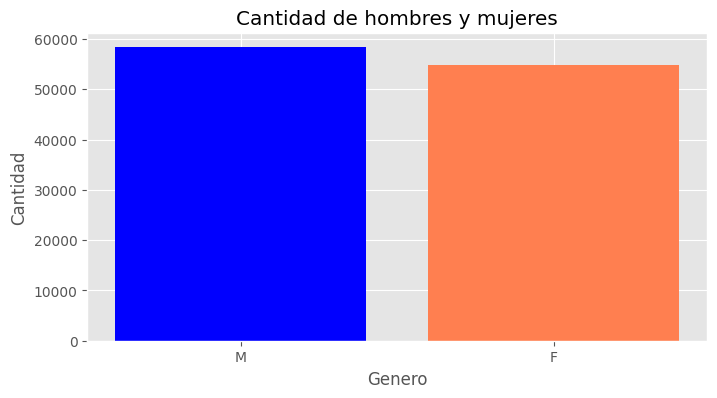

In [17]:
fig, ax = plt.subplots(figsize=(8,4))
colores = colores = ['b', "coral"]
ax.bar(g.index, g.values, color = colores)
ax.set_title('Cantidad de hombres y mujeres')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Genero')

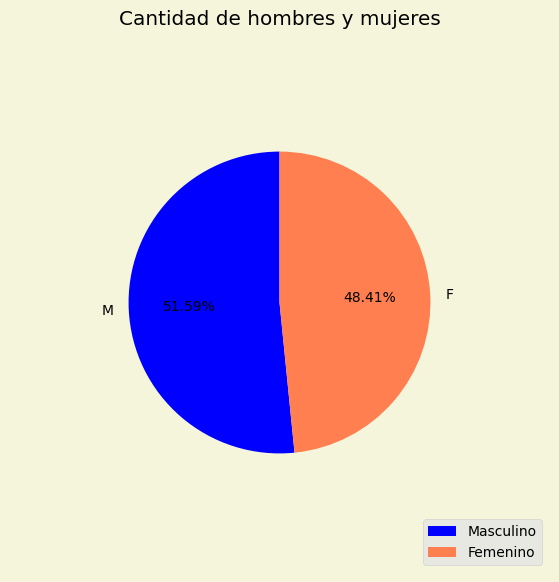

In [20]:
fig,ax = plt.subplots(figsize =(8,7))
nuevas_etiquetas = ['Masculino', 'Femenino']
colores = colores = ['b', 'coral']
fig.set_facecolor('#F5F5DC')
ax.pie(g, labels = g.index,radius=0.7,startangle=90,autopct= "%1.2f%%",colors =  colores)
plt.legend(loc="lower right", labels=nuevas_etiquetas, fontsize=10)
ax.set_title('Cantidad de hombres y mujeres')
plt.show()

In [21]:
cp = df["Product_Category"].value_counts()
cp

Product_Category
Accessories    70120
Bikes          25982
Clothing       16934
Name: count, dtype: int64

In [22]:
cp.values.sum()

113036

Text(0.5, 0, 'Categoria')

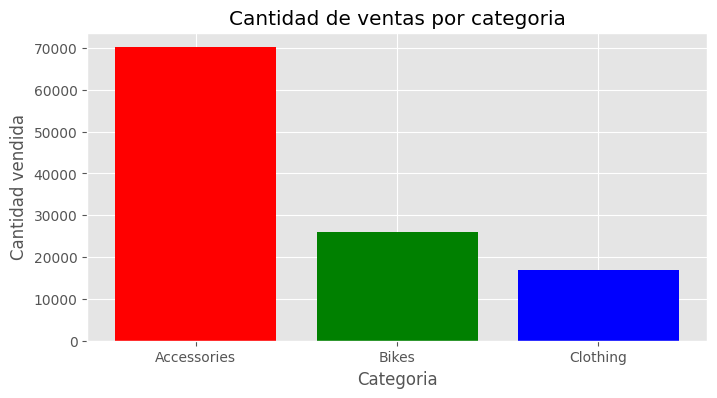

In [23]:
fig, ax = plt.subplots(figsize=(8,4))
colores = colores = ['r', 'g', 'b']
ax.bar(cp.index, cp.values, color = colores)
ax.set_title('Cantidad de ventas por categoria')
ax.set_ylabel('Cantidad vendida')
ax.set_xlabel('Categoria')

In [24]:
scp=df["Sub_Category"].value_counts()
scp

Sub_Category
Tires and Tubes      33870
Bottles and Cages    15876
Road Bikes           13430
Helmets              12158
Mountain Bikes        8854
Jerseys               6010
Caps                  4358
Fenders               4032
Touring Bikes         3698
Gloves                2686
Cleaners              1802
Shorts                1794
Hydration Packs       1334
Socks                 1122
Vests                  964
Bike Racks             592
Bike Stands            456
Name: count, dtype: int64

[Text(0, 0, 'Tires and Tubes'),
 Text(1, 0, 'Bottles and Cages'),
 Text(2, 0, 'Road Bikes'),
 Text(3, 0, 'Helmets'),
 Text(4, 0, 'Mountain Bikes'),
 Text(5, 0, 'Jerseys'),
 Text(6, 0, 'Caps'),
 Text(7, 0, 'Fenders'),
 Text(8, 0, 'Touring Bikes'),
 Text(9, 0, 'Gloves'),
 Text(10, 0, 'Cleaners'),
 Text(11, 0, 'Shorts'),
 Text(12, 0, 'Hydration Packs'),
 Text(13, 0, 'Socks'),
 Text(14, 0, 'Vests'),
 Text(15, 0, 'Bike Racks'),
 Text(16, 0, 'Bike Stands')]

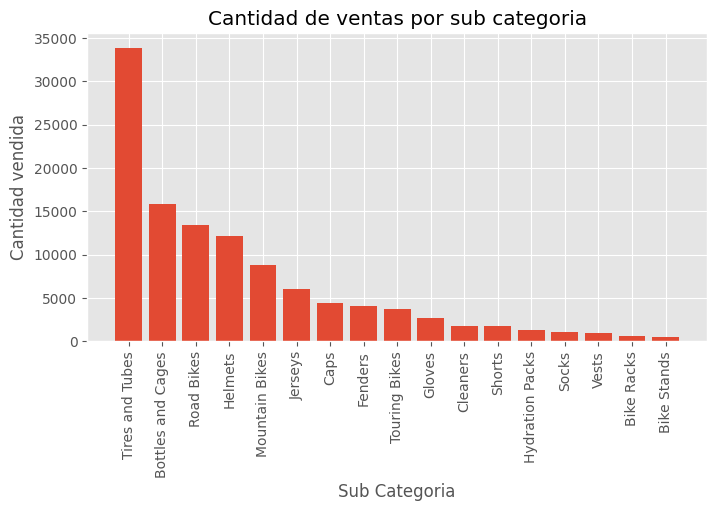

In [25]:
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(scp.index, scp.values)
ax.set_title('Cantidad de ventas por sub categoria')
ax.set_ylabel('Cantidad vendida')
ax.set_xlabel('Sub Categoria')
ax.set_xticklabels(scp.index, rotation=90)

In [26]:
c = df["Country"].value_counts()
c

Country
United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: count, dtype: int64

Text(0.5, 0, 'Pais')

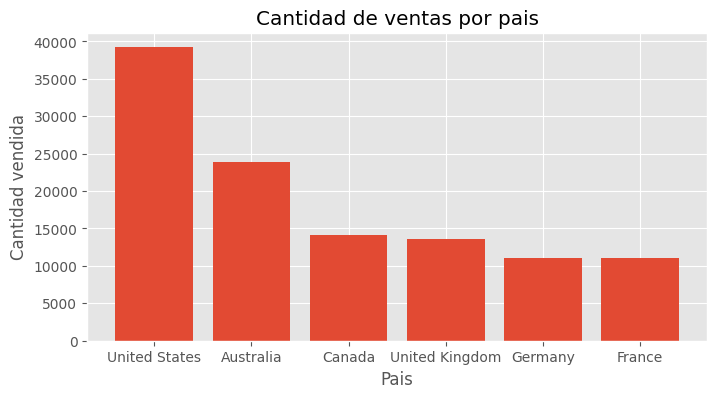

In [27]:
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(c.index, c.values)
ax.set_title('Cantidad de ventas por pais')
ax.set_ylabel('Cantidad vendida')
ax.set_xlabel('Pais')


In [81]:
vxa = df.groupby(['Year'])["Revenue"].sum()
vxa

Year
2011     8964888
2012     9175983
2013    15185968
2014    14152724
2015    19965917
2016    17713385
Name: Revenue, dtype: int64

Text(0.5, 0, 'Año')

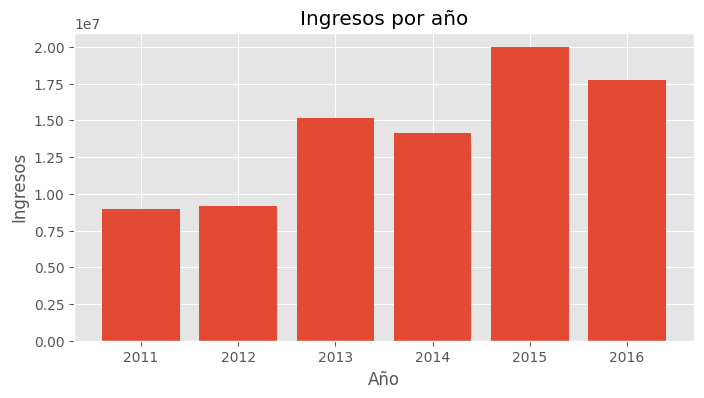

In [82]:
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(vxa.index, vxa.values)
ax.set_title('Ingresos por año')
ax.set_ylabel('Ingresos')
ax.set_xlabel('Año')

#TERCER PASO

---

Primera hipotesis

1) Segun lo que muestra el dataset puede ser que la categoria ("Bikes")fue la que tuvo mayor participacion en los ingresos.

Respuesta : al ver el gafico de barras que se realizo, esta hipotesis es verdadera.


In [28]:
ingresos_por_categoria = df.groupby(['Product_Category'])["Revenue"].sum()
ingresos_por_categoria

Product_Category
Accessories    15117992
Bikes          61782134
Clothing        8370882
Name: Revenue, dtype: int64

Text(0.5, 1.0, 'ingresos por categoria')

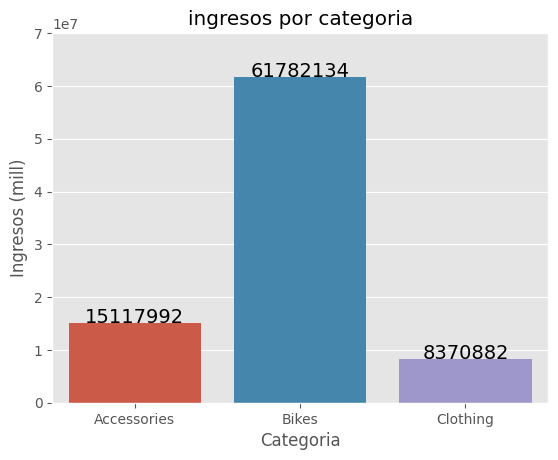

In [29]:
ic=sns.barplot(x = ingresos_por_categoria.index, y = ingresos_por_categoria, hue = ingresos_por_categoria.index , errorbar=None)
for i, v in enumerate(ingresos_por_categoria):
   ic.text(i, v + 0.2, str(v), ha='center', color='black', fontsize=14)
plt.xlabel('Categoria')
plt.ylabel('Ingresos (mill)')
plt.ylim(0, 70000000)
plt.title("ingresos por categoria")


------------------------------------------------------
Segunda hipotesis

2) Si es verdadera la primera hipotesis, se podria decir que, en base a sub categorias tambien lo relacionado a ("bikes") tuvo mayor participacion en ingresos.

Respuesta : esta hipotesis es verdadera, ya que las bicicletas vendidas son las mas caras, por ende, aumento lo ingresos.(2-B)

In [30]:
ingresos_por_subcategoria = df.groupby(["Sub_Category"])["Revenue"].sum().sort_values(ascending = False )
ingresos_por_subcategoria

Sub_Category
Road Bikes           33363061
Mountain Bikes       21123526
Touring Bikes         7295547
Helmets               5741081
Tires and Tubes       4670902
Jerseys               4113742
Shorts                1740710
Bottles and Cages     1409174
Fenders               1245733
Hydration Packs        990406
Vests                  949063
Gloves                 871419
Caps                   548777
Bike Racks             517800
Bike Stands            344075
Cleaners               198821
Socks                  147171
Name: Revenue, dtype: int64

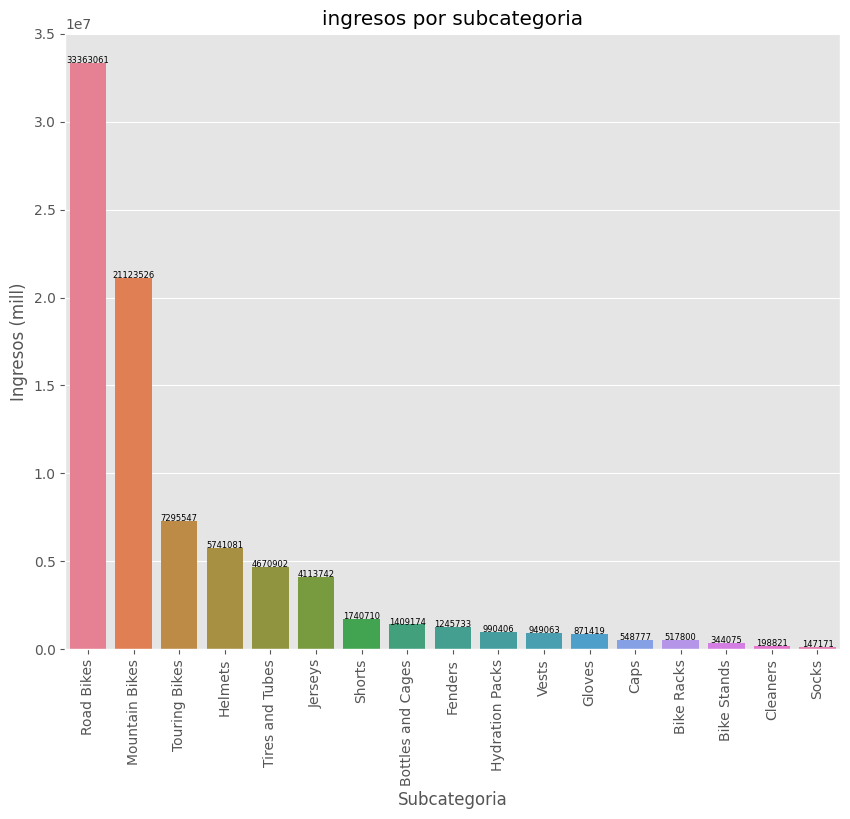

In [31]:
plt.figure(figsize=(10, 8))
isu=sns.barplot(x = ingresos_por_subcategoria.index, y = ingresos_por_subcategoria, hue = ingresos_por_subcategoria.index , errorbar=None)
for i, v in enumerate(ingresos_por_subcategoria):
   isu.text(i, v + 0.2, str(v), ha='center', color='black', fontsize=6)
plt.xlabel('Subcategoria')
plt.ylabel('Ingresos (mill)')
plt.xticks(rotation=90)

plt.title("ingresos por subcategoria")
plt.show()

------------------------------------------------------
Tercera hipotesis

3) Si en sub categorias, lo relacionado a ("bikes") tuvo mayo participacion, eso quiere decir que fue la mas vendida.

Respuesta : es falso, al comparar lo dos graficos hechos, se advierte que las bicicletas aunque fueron las que mas aportaron en los ingresos durante un periodo de tiempo, no fueron las mas vendidas sino que ese lugar lo ocuparon los productos relacionados con ("Accessories")

In [32]:
nuevo_data = df[["Year","Sub_Category","Revenue"]].groupby(by=["Year","Sub_Category"]).sum().reset_index()
nuevo_data

Year     Sub_Category  Revenue
0   2011   Mountain Bikes  2198270
1   2011       Road Bikes  6766618
2   2012   Mountain Bikes  2182853
3   2012       Road Bikes  6993130
4   2013       Bike Racks   112605
..   ...              ...      ...
67  2016           Shorts   423855
68  2016            Socks    40516
69  2016  Tires and Tubes  1296355
70  2016    Touring Bikes  2457126
71  2016            Vests   222018

[72 rows x 3 columns]

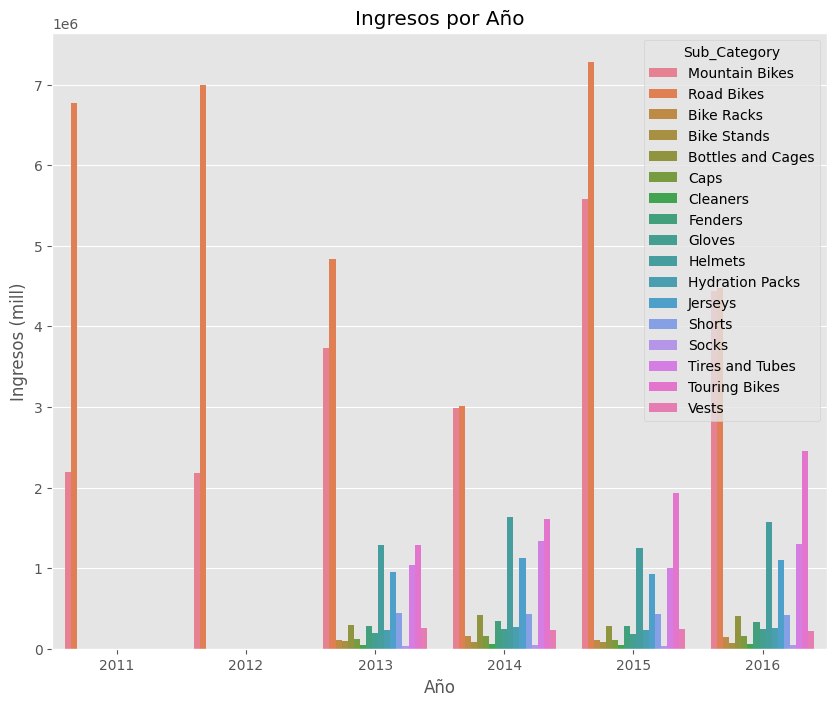

In [33]:
plt.figure(figsize=(10,8))
sns.barplot(data=nuevo_data,x = "Year", y= "Revenue", hue="Sub_Category",errorbar=None)
plt.xlabel('Año')
plt.ylabel('Ingresos (mill)')
plt.title("Ingresos por Año")
plt.show()

In [34]:
nuevo_data2 = df[["Year","Sub_Category","Order_Quantity"]].groupby(by=["Year","Sub_Category"]).count().reset_index()
nuevo_data2

Year     Sub_Category  Order_Quantity
0   2011   Mountain Bikes             615
1   2011       Road Bikes            2062
2   2012   Mountain Bikes             615
3   2012       Road Bikes            2062
4   2013       Bike Racks             137
..   ...              ...             ...
67  2016           Shorts             462
68  2016            Socks             313
69  2016  Tires and Tubes            9656
70  2016    Touring Bikes            1024
71  2016            Vests             277

[72 rows x 3 columns]

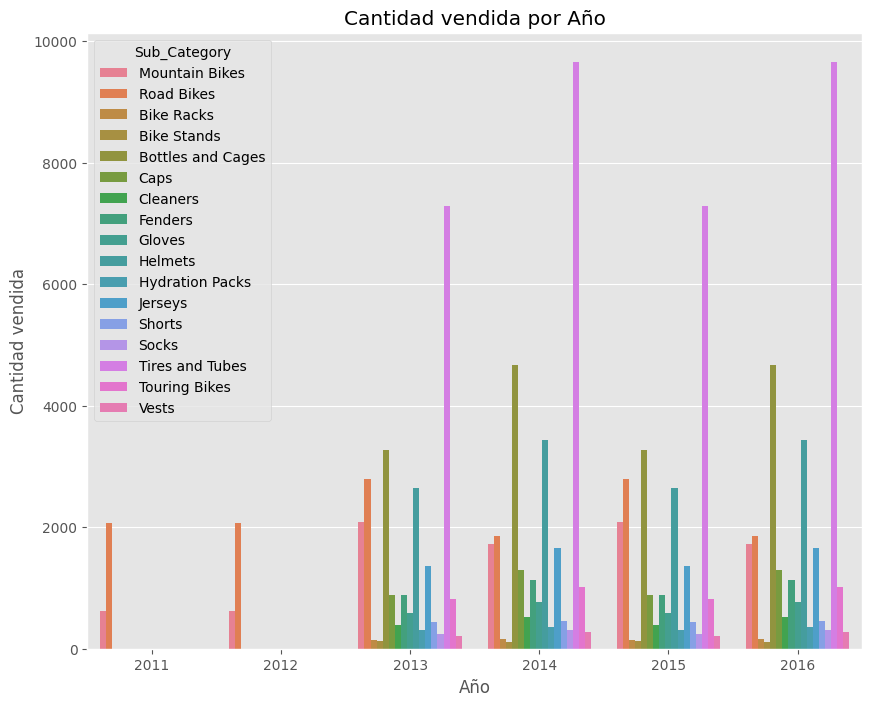

In [35]:
plt.figure(figsize=(10,8))
sns.barplot(data= nuevo_data2,x = "Year", y= "Order_Quantity", hue="Sub_Category",errorbar=None)
plt.xlabel('Año')
plt.ylabel('Cantidad vendida')
plt.title("Cantidad vendida por Año")
plt.show()

------------------------------------------------------
Cuarta hipotesis

4) Los adultos mayores (Entre 30 y 40 años ) son los que mas compras hicieron.

Respuesta: segun lo que muestra el grafico, no solo ese rango es el que tiene mas compras, sino que en realidad esta distribuido en un rango de (25 a 35 años) y que el genero masculino levemente es el que mas compras hace como se habia visto en el "SEGUNDO PASO".

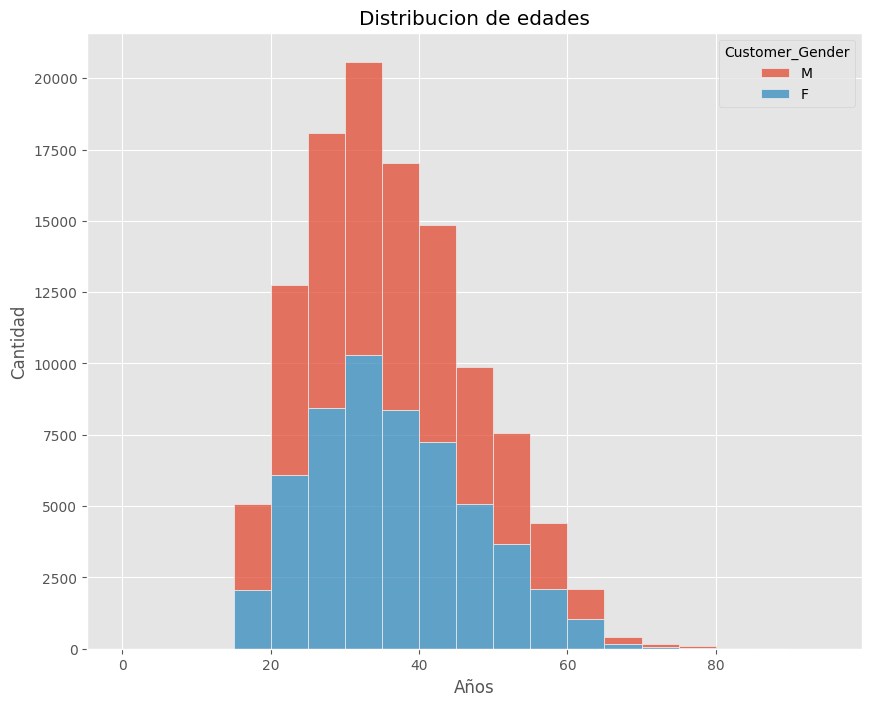

In [36]:
plt.figure(figsize=(10, 8))
# Axes-level
bin_width = 5
bin_range = range(0, 100, bin_width)
az=sns.histplot(data=df, x="Customer_Age", hue="Customer_Gender", multiple="stack",bins=bin_range)
az.set_xlabel("Años")
az.set_ylabel("Cantidad")
az.set_title("Distribucion de edades")
plt.show()

------------------------------------------------------
Quinta hipotesis

5)El mes que mas ingresos tuvo fue el de diciembre.

Respuesta : hipotesis correcta, no solo fue el mes de diciembre sino que tambien fue el mes de junio, lo que da a entender que en diciembre se incrementaron las ventas por las fiestas navideñas y en junio por las vacaciones de verano.

In [37]:
ingresos_por_mes = df.groupby(['Month'])['Revenue'].sum().sort_values(ascending = False )
ingresos_por_mes

Month
December     9086931
June         9043008
May          8836763
April        7602750
March        7347164
January      7005895
February     6834583
November     6244298
October      5995079
September    5841885
July         5721459
August       5711193
Name: Revenue, dtype: int64

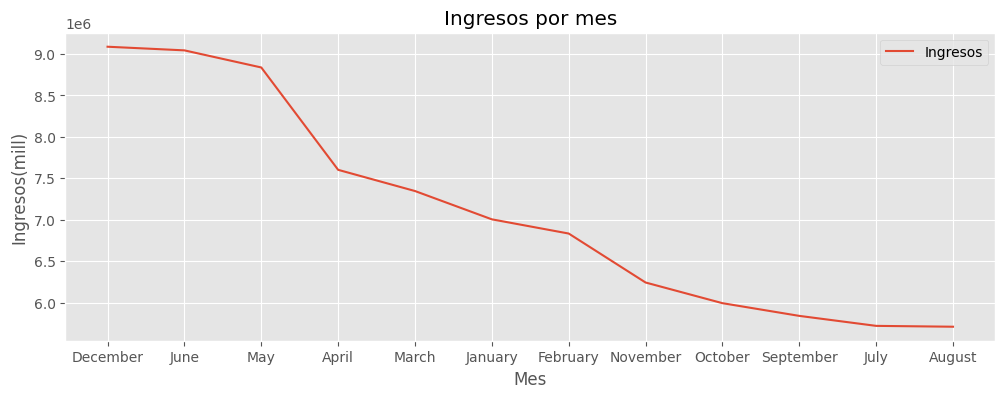

In [38]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(ingresos_por_mes.index, ingresos_por_mes, label='Ingresos')
ax.set_xlabel('Mes')
ax.set_ylabel('Ingresos(mill)')
ax.set_title('Ingresos por mes')
ax.legend()

------------------------------------------------------
Sexta hipotesis

6)¿Cual fue el producto que mas ingresos genero?

Respuesta : El producto que mas ingreso genero es ("Road-150 Red, 62") pero comprandolo en EE.UU que fue el pais que mas ventas tuvo , este producto se encuentra en la cuarta posicion, dando a entender que habria que promocionar mas esta bicicleta en este pais.

In [39]:
nuevo_data3 = df[["Product","Product_Category","Revenue"]].groupby(by=["Product","Product_Category"]).sum().reset_index().sort_values(by = "Revenue",ascending = False)
nuevo_data3

Product Product_Category  Revenue
63          Road-150 Red, 62            Bikes  3829416
34    Mountain-200 Black, 38            Bikes  3366248
61          Road-150 Red, 52            Bikes  3180840
62          Road-150 Red, 56            Bikes  3158805
38   Mountain-200 Silver, 42            Bikes  3081078
..                       ...              ...      ...
52   Mountain-500 Silver, 48            Bikes    25794
48    Mountain-500 Black, 52            Bikes    19287
8      Fender Set - Mountain         Clothing      635
0               AWC Logo Cap      Accessories      459
130    Water Bottle - 30 oz.         Clothing       16

[134 rows x 3 columns]

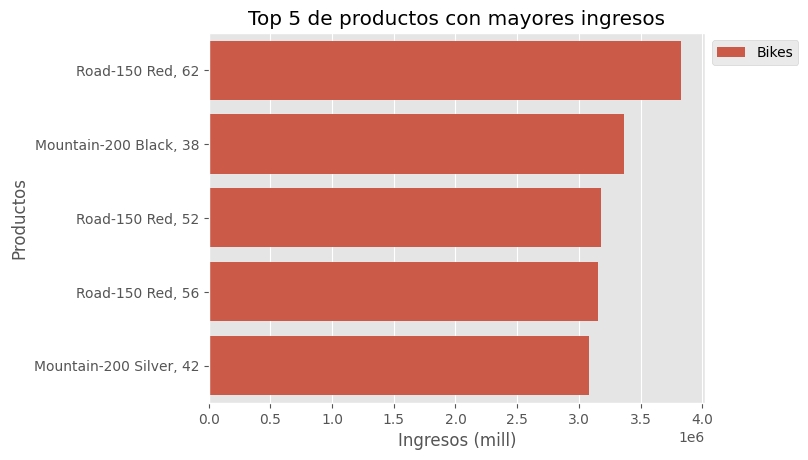

In [40]:
gr = sns.barplot(data=nuevo_data3.head(5), x="Revenue", y="Product", hue = "Product_Category")
gr.legend(loc="upper left", bbox_to_anchor=(1, 1))
gr.set_xlabel("Ingresos (mill)")
gr.set_ylabel("Productos")
gr.set_title("Top 5 de productos con mayores ingresos")
plt.show()

In [41]:
nuevo_data4 = df[["Country","Product","Revenue"]].groupby(by=["Country","Product"]).sum().reset_index().sort_values(by = "Revenue",ascending = False)
nuevo_data4

Country                  Product  Revenue
673   United States         Road-150 Red, 48  1417666
674   United States         Road-150 Red, 52  1385411
61        Australia         Road-150 Red, 62  1344402
652   United States  Mountain-200 Silver, 42  1246182
676   United States         Road-150 Red, 62  1196887
..              ...                      ...      ...
539  United Kingdom   Mountain-500 Black, 48     1555
320          France       Road-650 Black, 48     1504
454         Germany       Road-650 Black, 62     1362
172          Canada  Mountain-500 Silver, 48     1118
666   United States  Mountain-500 Silver, 52      972

[745 rows x 3 columns]

In [42]:
us_data = nuevo_data4[nuevo_data4["Country"] == "United States"]
us_data

Country                  Product  Revenue
673  United States         Road-150 Red, 48  1417666
674  United States         Road-150 Red, 52  1385411
652  United States  Mountain-200 Silver, 42  1246182
676  United States         Road-150 Red, 62  1196887
650  United States   Mountain-200 Black, 46  1167160
..             ...                      ...      ...
732  United States    Touring-3000 Blue, 50     4911
700  United States         Road-650 Red, 44     3836
696  United States       Road-650 Black, 52     3054
702  United States         Road-650 Red, 52     2694
666  United States  Mountain-500 Silver, 52      972

[129 rows x 3 columns]

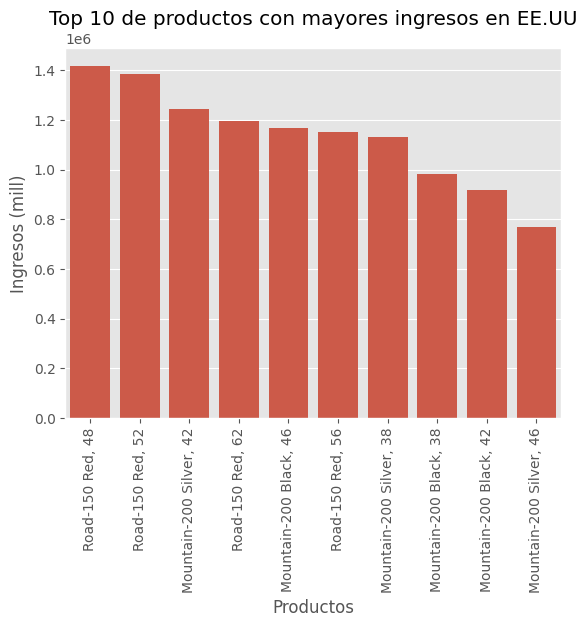

In [43]:
pi = sns.barplot(data=us_data.head(10), x="Product", y="Revenue")
labels = pi.get_xticklabels()
pi.set_xticklabels(labels, rotation=90)
pi.set_xlabel("Productos")
pi.set_ylabel("Ingresos (mill)")
pi.set_title("Top 10 de productos con mayores ingresos en EE.UU")
plt.show()

--------------------------------------------
Septima hipotesis

7) Existe una relacion directa entre ingresos("Revenue") y ganancias("Profit").

Respuesta : es verdadera, existe una relacion directa pero al realizar el grafico se encuntran valores atipicos que luego se van a analizar.

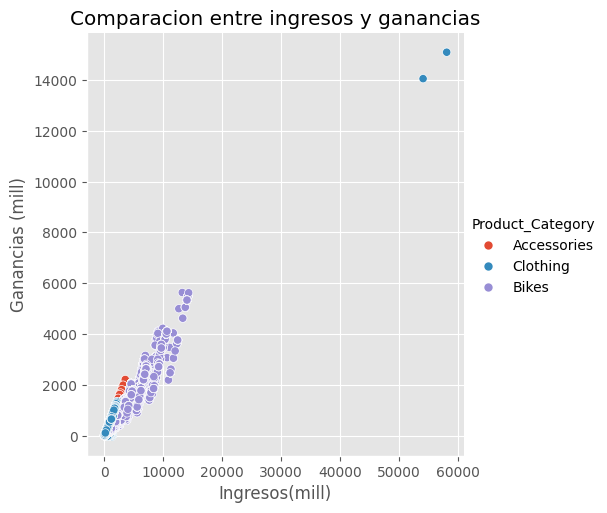

In [44]:
sns.relplot(data=df, x="Revenue", y="Profit", hue="Product_Category", kind="scatter")
plt.xlabel('Ingresos(mill)')
plt.ylabel('Ganancias (mill)')
plt.title("Comparacion entre ingresos y ganancias")
plt.show()

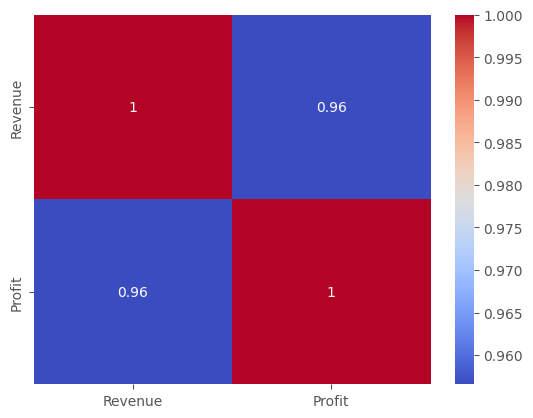

In [45]:
columnas_seleccionadas = df[['Revenue', 'Profit']]
matriz_correlacion = columnas_seleccionadas.corr()
sns.heatmap(matriz_correlacion, cmap='coolwarm', annot=True)
plt.show()

#CUARTO PASO - BUSQUEDA DE OUTLIERS

Al haber analizado una hipotesis en un grafico de dispercion (7-G) nos encontramos con varios valores outliers, se lo vuelve a analizar en un grafico boxplot y se termina confirmando que estos valores se encuentran en el año 2013 y 2015 y ambos son de la categoria ("Clothing"), para tener una mejor idea de a quien pertenece, se lo analizo por genero y pertenece al masculino. Recomendacion: A mi parecer recomiendo eliminar por lo menos los dos valores mas extremos que son mayores a 50000 en ingresos, ya que son muy elevados y podrian estar arruinando todo el analisis.


---


Text(0.5, 1.0, 'Ingresos por Año')

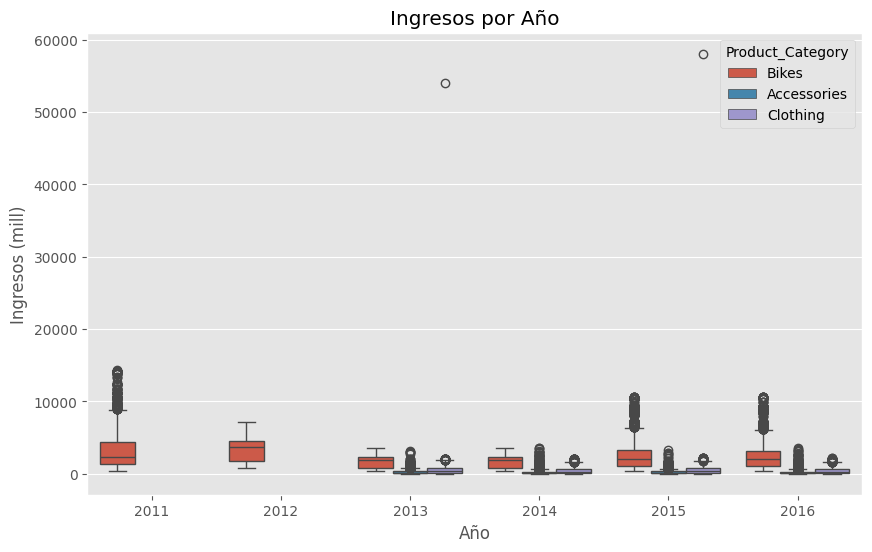

In [46]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x=df.Year, y=df.Revenue, data=df, hue = df.Product_Category)
plt.xlabel('Año')
plt.ylabel('Ingresos (mill)')
plt.title("Ingresos por Año")

Text(0.5, 1.0, 'Ingresos por genero')

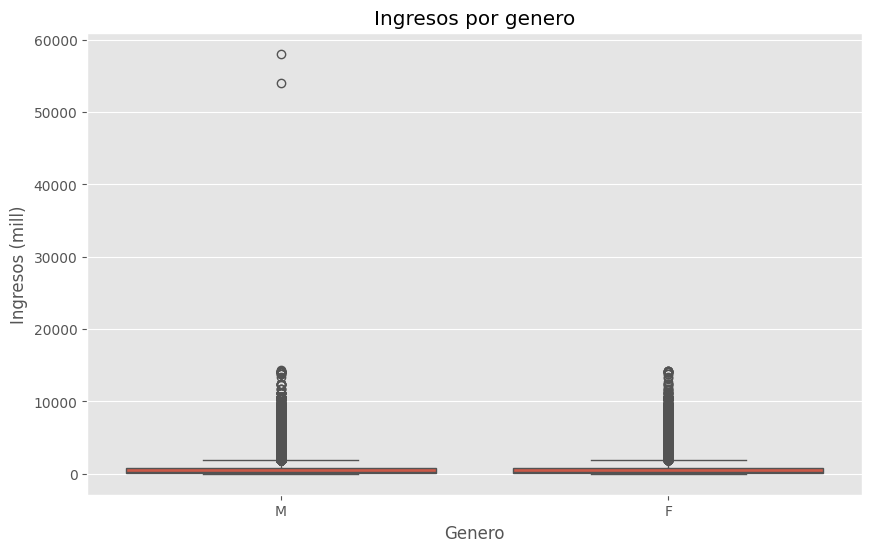

In [47]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df.Customer_Gender, y= df.Revenue)
plt.xlabel('Genero')
plt.ylabel('Ingresos (mill)')
plt.title("Ingresos por genero")

In [48]:
valor_max = df["Revenue"].quantile(0.75) + 1.5*(df["Revenue"].quantile(0.75)-df["Revenue"].quantile(0.25))
valor_max

1905.5

In [49]:
outliers = df["Revenue"][df["Revenue"]>valor_max].sort_values(ascending = False )
outliers

112073    58074
112072    54069
71129     14312
68671     14169
70699     14169
          ...  
59410      1906
58953      1906
58952      1906
58951      1906
64582      1906
Name: Revenue, Length: 14765, dtype: int64

In [50]:
df[df["Revenue"] > 50000]

Date  Day Month  Year  Customer_Age       Age_Group  \
112072 2013-07-24   24  July  2013            52  Adults (35-64)   
112073 2015-07-24   24  July  2015            52  Adults (35-64)   

       Customer_Gender    Country       State Product_Category Sub_Category  \
112072               M  Australia  Queensland         Clothing        Vests   
112073               M  Australia  Queensland         Clothing        Vests   

                        Product  Order_Quantity  Unit_Cost  Unit_Price  \
112072  Touring-1000 Yellow, 50              27       1482        2384   
112073  Touring-1000 Yellow, 50              29       1482        2384   

        Profit   Cost  Revenue  
112072   14055  40014    54069  
112073   15096  42978    58074

#QUINTO PASO - ANALISIS DESCRIPTIVO

Analizando el graficos y los datos que obtuvimos de ("Revenue"), nos damos cuenta que los datos estan demasiados dispersos, por lo tanto la media no es muy representativa que digamos, podria cambiar si se eliminan los dos valores extremos de los outliers.
En cambio, en ("Customer_Age") es todo lo contraio, los datos estan mas agrupados, y se podria decir que son mas homogeneos.

---

In [53]:
print(df['Revenue'].mean().round(1))
print(round(df['Revenue'].median(), 1))

754.4
223.0


<Axes: >

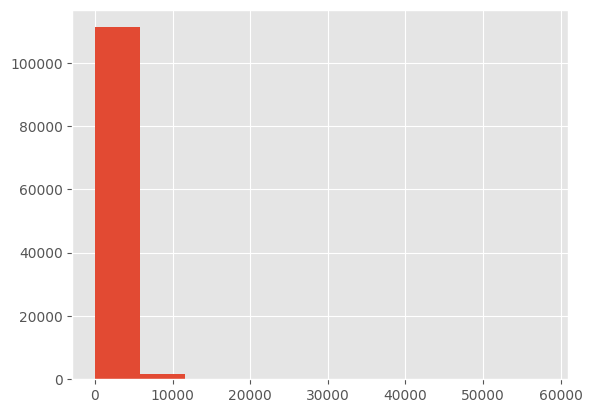

In [54]:
df['Revenue'].hist()

In [57]:
round(df['Revenue'].std(), 1)

1309.1

In [58]:
df['Revenue'].mean().round(1)

754.4

In [59]:
coef_var = (df["Revenue"].std() / df['Revenue'].mean()) *100
coef_var

173.53474409121586

In [62]:
print(df['Customer_Age'].mean().round(1))
print(round(df['Customer_Age'].median(), 1))

35.9
35.0


<Axes: >

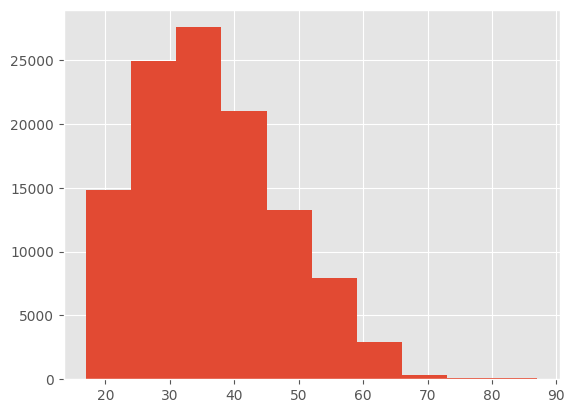

In [63]:
df['Customer_Age'].hist()

In [66]:
round(df['Customer_Age'].std(), 1)

11.0

In [67]:
df['Customer_Age'].mean().round(1)

35.9

In [68]:
coef_var = (df["Customer_Age"].std() / df['Customer_Age'].mean()) *100
coef_var

30.685349536585598

#SEXTO PASO - ELIMINACION DE OUTLIERS
Se procede a eliminar los outliers para poder hacer un analisis mucho mejor y que no afecte de manera negatica los modelos de regresion

In [69]:
#SE ELIMINAN ESTAS DOS FILAS--YA QUE SON OUTLIERS
df[df["Revenue"] > 50000]

Date  Day Month  Year  Customer_Age       Age_Group  \
112072 2013-07-24   24  July  2013            52  Adults (35-64)   
112073 2015-07-24   24  July  2015            52  Adults (35-64)   

       Customer_Gender    Country       State Product_Category Sub_Category  \
112072               M  Australia  Queensland         Clothing        Vests   
112073               M  Australia  Queensland         Clothing        Vests   

                        Product  Order_Quantity  Unit_Cost  Unit_Price  \
112072  Touring-1000 Yellow, 50              27       1482        2384   
112073  Touring-1000 Yellow, 50              29       1482        2384   

        Profit   Cost  Revenue  
112072   14055  40014    54069  
112073   15096  42978    58074

In [70]:
#SE PROCEDE A ELIMINARLAS
df.drop(df[df["Revenue"] > 50000].index, inplace=True)
df.reset_index(drop=True, inplace=True)

#Conclusion parcial

Es un dataset bastante completo, de la cual se pueden sacar varias conclusiones:

. En lo que respecta a paises, EE.UU es el que mayor ventas tiene , lo que hace pensar que deberia mejorar su publicidad o hacer una campaña mas agresiva en Europa y Asia y ver que resultados obtuvo en lo futuros años.

. En la parte de ventas por genero, la verdad es que es muy parejo, en todo caso se puede recomendar hacer publicidad o descuentos a productos que sean de uso femenino.

.En lo que hace refencia a ventas de productos, la categoria (Accessories)
 es la que mas ventas realizo pero no que la que mas ingresos genero, es por este motivo que se recomienda hacer un poco mas de presion en la ventas de todo lo que representa (Bikes) y (Clothings)

.Por ultimo, los ingresos por año fueron aumentando hasta el 2015 y luego bajo en el año 2016, se podria relaizar un modelo ara poder predecir si esta tendencia va a seguir o se revierte.